In [6]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Project 1
Due March 12, 2019.

For the midterm project, you will develop a Tolman-Oppenheimer-Volkov (TOV) solver to compute the hydrostatic structure of a relativistic neutron star. You will use this to determine the maximum masses of cold neutron stars (NSs) for several different equations of state (EOS).

Your code should adhere to the course Coding Standards.

  - Write a numerical solver for the spherically-symmetric TOV equations using a fourth-order Runge-Kutta integrator. Assume a polytropic EOS specified by $K$ and $\gamma$. You may find these notes particularly helpful.
  
\begin{align}
\frac{dm}{dr} &= 4\pi r^2 \rho \\
\frac{dP}{dr} &= -\frac{\rho m }{r^2}\left ( 1 + \frac{P}{\rho}\right ) \left( 1 + \frac{4\pi P^3}{m} \right ) \left ( 1 - \frac{2m}{r}\right ) ^{-1}\\
\frac{d\Phi}{dr} &= - \frac{1}{\rho} \frac{dP}{dr}\left( 1 + \frac{P}{\rho}\right ) ^{-1}
\end{align}

For a polytropic eos: $P = K \rho_0^\Gamma$, where $K$ is the polytropic gas constant and $n$ defined by $\Gamma \equiv 1 + 1/n$ is the polytropic index. We then have   $\rho = \rho_0 + P/(\Gamma -1 )$  and $\rho_0 \epsilon = P/(\Gamma -1 )$.
   
Below, constants are the corresponding barred ones.

In [8]:
from polytrope_star import PolytropeStar
import numpy as np
import matplotlib.pyplot as plt

/home/halvard/uio/PHY905_NumericalRelativity/project1/polytrope_star.py:25: RuntimeWarning: invalid value encountered in double_scalars
  return (P/self.K) ** (1/self._gamma)


2.4375144350725285e-31
7.807083010105192e-31
6.626073140304381e-31
5.55681772004342e-31
4.4693911015970774e-30
9.297197991787412e-31
1.2918647993780986e-30
2.652955717257455e-31
1.9723359166873597e-30
2.7617361023090995e-30
0.16151886459991324


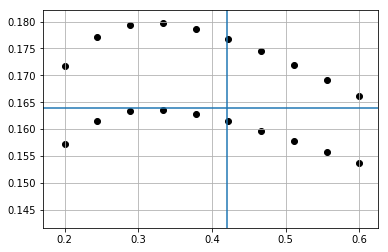

In [10]:
test_star = PolytropeStar(gamma = 2)
integrator = 'dopri5'

for rhoc_bar in np.linspace(0.2, 0.6, 10):
    test_star.set_initial_conditions(rhoc = rhoc_bar)
    solver =  test_star.solve_star_ivp(integrator = integrator)
    print(solver.y[1][-1])
    plt.scatter(rhoc_bar, solver.y[0][-1], c='k')
    plt.scatter(rhoc_bar, solver.y[3][-1], c='k')
solver = test_star.set_initial_conditions(rhoc = 0.420).solve_star_ivp(
                    integrator = integrator)
print(solver.y[0][-1])
plt.axvline(0.42)
plt.axhline(0.164)
plt.grid()

In [11]:
n = 4/7
gamma = 1+1/n
print(gamma)

K = 30000 # in c = G = M_sun = 1

2.75


  - Determine the maximum mass of a cold NS for $K=30000$ (in $G=c=M_\odot=1$ units) and $\gamma=2.75$.
  
First we calculate

In [23]:
gamma = 2.75
n = 1/(gamma - 1)

values = []

N = 200
for rhoc_bar in np.linspace(0.1, 1.8, N):
    test_star = PolytropeStar(gamma).set_initial_conditions(rhoc = rhoc_bar)
    solver = test_star.solve_star_ivp()

    r = solver.t
    M, P, Phi, M0 = solver.y
    values.append([r[-1], M[-1], P[-1], Phi[-1], M0[-1], rhoc_bar])
   

/home/halvard/uio/PHY905_NumericalRelativity/project1/polytrope_star.py:25: RuntimeWarning: invalid value encountered in double_scalars
  return (P/self.K) ** (1/self._gamma)


Then we plot 

<IPython.core.display.Math object>


Maximum values for K = 30000, \gamma = 2.75:
     M_bar = 0.128
     R     = 11.97  km
     M     = 2.434 M_sun   
     M_0   = 2.896 M_sun     
     rho_c = 1.395e+15 g/cc      



Text(0.5,0,'Central density [g/cc]')

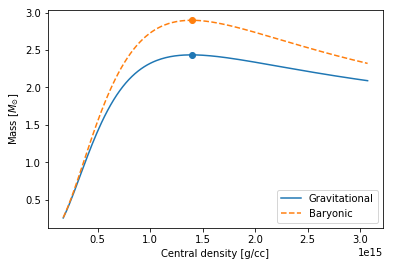

In [24]:
K     = 30000      # C = G = M_sun = 1
K_cgs = 1.98183e-6 # cgs
 
radius, grav_mass, pressure, _, mass, rhoc_bar = np.array(values).T
imax = np.argmax(grav_mass)

M_max_sun = grav_mass[imax] * K**(n/2)

length_conv  = 6.7706e-6
density_conv = 1.6199e-18
rhoc_cgs = rhoc_bar * K**(-n)/density_conv
r_km     = radius * K**(n/2)/length_conv * 1e-5

from IPython.display import display, Latex, Math
display(Math("Ax=b"))

disp_string = r"""
Maximum values for K = 30000, \gamma = 2.75:
     M_bar = {mbar:.3f}
     R     = {r:.4g}  km
     M     = {gm:.3f} M_sun   
     M_0   = {bm:.3f} M_sun     
     rho_c = {cd:.4g} g/cc      
""".format(mbar = grav_mass[imax], r =  r_km[imax],
           gm =  grav_mass[imax] * K**(n/2),
           bm =  mass[imax] * K**(n/2), 
           cd =  rhoc_cgs[imax])

print(disp_string)

plt.scatter(rhoc_cgs[imax], grav_mass[imax] * K**(n/2), c = 'C0')
plt.scatter(rhoc_cgs[imax], mass[imax]* K**(n/2), c = 'C1')

plt.plot(rhoc_cgs, grav_mass* K**(n/2), '-', label = 'Gravitational')
plt.plot(rhoc_cgs, mass* K**(n/2), '--', label = 'Baryonic')
plt.legend()
plt.ylabel('Mass [$M_{\odot}$]')
plt.xlabel('Central density [g/cc]')

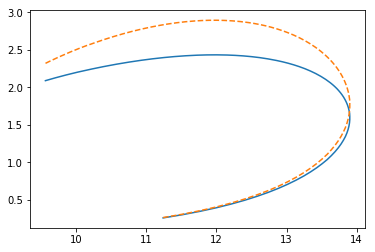

In [26]:
plt.plot(r_km, grav_mass* K**(n/2), '-', label = 'Gravitational')
plt.plot(r_km, mass* K**(n/2), '--', label = 'Baryonic')

In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

 
  - Now, modify your code to use any arbitrary table-based EOS. Specifically, make your solver compatible with the EOS available on stellarcollapse.org. There is example code on that site in C++ and Fortran for reading and using the tables there, and working with the EOS tables is trivial in Python using h5py.
 

  - Determine the maximum mass for any five of the EOS available on stellarcollapse.org.

# Calculate final values for all five tables

h5_files/Hempel_SFHoEOS_rho222_temp180_ye60_version_1.1_20120817.h5
h5_files/HShen_HyperonEOS_rho220_temp180_ye65_version_1.1_20131007.h5


IndexError: index 0 is out of bounds for axis 0 with size 0

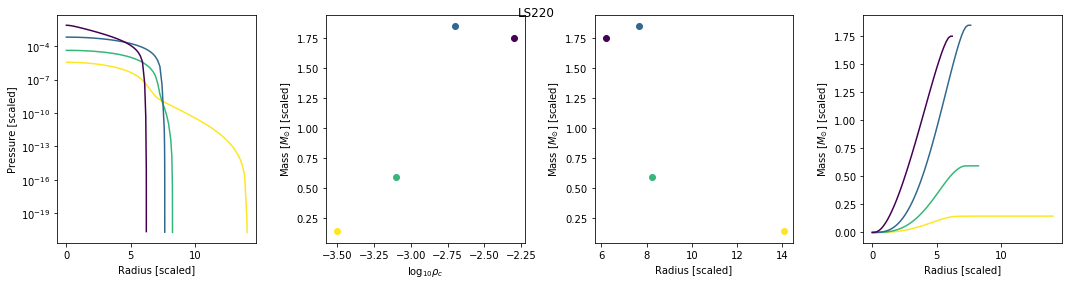

In [11]:
fvals = []
filenames = ['Hempel_SFHoEOS_rho222_temp180_ye60_version_1.1_20120817.h5.dat',
             'Hempel_SFHxEOS_rho234_temp180_ye60_version_1.1_20120817.h5.dat',
             'Hempel_TM1EOS_rho234_temp180_ye60_version_1.1_20120817.h5.dat',
             'Hempel_TMAEOS_rho234_temp180_ye60_version_1.1_20120817.h5.dat',
             'LS220_3335_rho391_temp163_ye66.h5.dat']
filenames = ["Hempel_SFHoEOS_rho222_temp180_ye60_version_1.1_20120817.h5",
             "HShen_HyperonEOS_rho220_temp180_ye65_version_1.1_20131007.h5",
]

short_names = ['LS220','SFHo','SFHx','TM1','TMA']
rho_values = np.linspace(-3.5, -2.3, 4)

for fname, sname in zip(filenames, short_names):
    print('h5_files/' + fname)
    test = TableStar('h5_files/' + fname)
    
    # this line runs everything
    res = run_star(test, rho_values = rho_values)
    fvals.append(res)
    
    fig = plt.gcf()
    fig.suptitle(sname)

In [ ]:
fvals = []
filenames = ['Hempel_SFHoEOS_rho222_temp180_ye60_version_1.1_20120817.h5.dat',
             'Hempel_SFHxEOS_rho234_temp180_ye60_version_1.1_20120817.h5.dat',
             'Hempel_TM1EOS_rho234_temp180_ye60_version_1.1_20120817.h5.dat',
             'Hempel_TMAEOS_rho234_temp180_ye60_version_1.1_20120817.h5.dat',
             'LS220_3335_rho391_temp163_ye66.h5.dat']
short_names = ['LS220','SFHo','SFHx','TM1','TMA']
rho_values = np.linspace(-3.5, -2.3, 4)

for fname, sname in zip(filenames, short_names):
    print('eos_dat/' + fname)
    test = TableStar('eos_dat/' + fname)
    
    # this line runs everything
    res = run_star(test, rho_values = rho_values)
    fvals.append(res)
    
    fig = plt.gcf()
    fig.suptitle(sname)
    fig.tight_layout()

In [ ]:
fig, [ax1,ax2] = plt.subplots(2, figsize = [6,6])
for i, (final_values, sname) in enumerate(zip(fvals, short_names)):
    rho, r_values, m_values, P_values, phi_values, M0_values = np.array(final_values).T
    to_km = 1e-5/6.7706e-6

    c = 'C{}'.format(i)
    ax1.plot(to_km*r_values, m_values, '-', color = c, label = sname + ' grav')
    
    i_max = np.argmax(m_values)
    # assert (i_max == np.argmax(M0_values))
    
    m_max = m_values[i_max]
    M0_max = M0_values[i_max]
    ax1.scatter(to_km*r_values[i_max], m_max, c = c, marker = 'x')
    # ax1.scatter(to_km*r_values[i_max], M0_max, c = c, marker = 'o')
    ax2.scatter(i, m_max, c = 'k', marker = 'x')
    ax2.scatter(i, M0_max, c = 'k', marker = 'o')
    
ax2.set_xticks(range(len(short_names)))
ax2.set_xticklabels(short_names)
ax1.legend()
ax2.legend(['Gravitational','Baryonic'])
ax1.grid()
ax2.grid()

ax1.set_xlabel('Radius [km]')
ax1.set_ylabel(r'Mass [$M_\odot$]')
ax2.set_ylabel(r'Maximal mass [$M_\odot$]')

ax1.set_xlim([10,16])
fig.tight_layout()
# ax2.legend('')